## Impoting all the required Modules

In [182]:
import re
import os
import emoji
import pandas as pd 
import numpy as np 
import string
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns
from nltk.corpus import stopwords
%matplotlib inline
sns.set_style("whitegrid");

## Reading the Files Containing tweets data

In [120]:
files=[]
for root,dirs,filenames in os.walk('F:/Data'): # os.walk will go to the Path and will fdetermine whats are the file , whats the dir and root 
    for filename in filenames:                 #File path containing our months data
        files.append(filename)
        
for pos,data in enumerate(files):
    print(pos+1,data)

1 2020-04-01 Coronavirus Tweets.CSV
2 2020-04-02 Coronavirus Tweets.CSV
3 2020-04-03 Coronavirus Tweets.CSV
4 2020-04-04 Coronavirus Tweets.CSV
5 2020-04-05 Coronavirus Tweets.CSV
6 2020-04-06 Coronavirus Tweets.CSV
7 2020-04-07 Coronavirus Tweets.CSV
8 2020-04-08 Coronavirus Tweets.CSV
9 2020-04-09 Coronavirus Tweets.CSV
10 2020-04-10 Coronavirus Tweets.CSV
11 2020-04-11 Coronavirus Tweets.CSV
12 2020-04-12 Coronavirus Tweets.CSV
13 2020-04-13 Coronavirus Tweets.CSV
14 2020-04-14 Coronavirus Tweets.CSV
15 2020-04-15 Coronavirus Tweets.CSV
16 2020-04-16 Coronavirus Tweets.CSV
17 2020-04-17 Coronavirus Tweets.CSV
18 2020-04-18 Coronavirus Tweets.CSV
19 2020-04-19 Coronavirus Tweets.CSV
20 2020-04-20 Coronavirus Tweets.CSV
21 2020-04-21 Coronavirus Tweets.CSV
22 2020-04-22 Coronavirus Tweets.CSV
23 2020-04-23 Coronavirus Tweets.CSV
24 2020-04-24 Coronavirus Tweets.CSV
25 2020-04-25 Coronavirus Tweets.CSV
26 2020-04-26 Coronavirus Tweets.CSV
27 2020-04-27 Coronavirus Tweets.CSV
28 2020-04

### Asking for 1 file of specific day of april from the user 

## Reading a Entered Day Tweet to Analyse 

In [121]:
file_num= int(input("Please Enter the date (0 to 30) you want to analyse   "))
a=files[file_num-1]      # Contains the name of File 
date = a.split()[0]    #Constains the Date of the the Tweets
print ("\n You Entered " , date)

Please Enter the date (0 to 30) you want to analyse   8

 You Entered  2020-04-08


In [274]:
df = pd.read_csv('F:/Data/'+a) # Concatenating file path with the name of file and Coverting it into Dataframe

### Undersatnding our data  

In [219]:
df.head(3) # Having a Look at the head of Data

,status_id,user_id,created_at,screen_name,text,source,reply_to_status_id,reply_to_user_id,reply_to_screen_name,is_quote,is_retweet,favourites_count,retweet_count,country_code,place_full_name,place_type,followers_count,friends_count,account_lang,account_created_at,verified,lang
0,1247675523666337792,219339577,2020-04-08T00:00:00Z,Canalteleamiga,El cantante español @AlejandroSanz anunció nue...,TweetDeck,NaN,NaN,NaN,False,False,4913,0,NaN,NaN,NaN,7160,861,NaN,2010-11-24T15:58:39Z,False,es
1,1247675523666341888,1133047963939409922,2020-04-08T00:00:00Z,ZacatlanTV,Durante la contingencia sanitaria por #Covid19...,TweetDeck,NaN,NaN,NaN,False,False,92,1,NaN,NaN,NaN,140,62,NaN,2019-05-27T16:31:00Z,False,es
2,1247675523678924801,353345474,2020-04-08T00:00:00Z,ChicoNR,"In response to the #COVID19 crisis, Chico’s Si...",TweetDeck,NaN,NaN,NaN,False,False,157,0,NaN,NaN,NaN,4262,331,NaN,2011-08-11T22:56:45Z,False,en


In [220]:
df.tail(3) # Having a Look at the head of Data

,status_id,user_id,created_at,screen_name,text,source,reply_to_status_id,reply_to_user_id,reply_to_screen_name,is_quote,is_retweet,favourites_count,retweet_count,country_code,place_full_name,place_type,followers_count,friends_count,account_lang,account_created_at,verified,lang
99997,1247776410195787777,861834848113217536,2020-04-08T06:40:53Z,DDUttarPradesh,#Covid-19 के मामले बढ़े।\nअभी देखिए \nकार्यक्र...,Twitter Web App,NaN,NaN,NaN,False,False,26901,1,NaN,NaN,NaN,3541,135,NaN,2017-05-09T06:46:54Z,False,hi
99998,1247776410715877379,1682859480,2020-04-08T06:40:53Z,EliseTillet,Protecting and enabling #Humanrights defenders...,TweetDeck,NaN,NaN,NaN,False,False,3781,0,NaN,NaN,NaN,7347,946,NaN,2013-08-19T10:13:01Z,False,en
99999,1247776412427112451,1243600894039592961,2020-04-08T06:40:53Z,JBTechnoCare1,75% Trade down for retailers #worldwide during...,Twitter Web App,NaN,NaN,NaN,False,False,145,2,NaN,NaN,NaN,59,150,NaN,2020-03-27T18:09:30Z,False,en


In [221]:
print("Rows and Columns : ", df.shape);

Rows and Columns :  (100000, 22)


In [222]:
print("Columns Names   : \n", df.columns);

Columns Names   : 
 Index(['status_id', 'user_id', 'created_at', 'screen_name', 'text', 'source',
       'reply_to_status_id', 'reply_to_user_id', 'reply_to_screen_name',
       'is_quote', 'is_retweet', 'favourites_count', 'retweet_count',
       'country_code', 'place_full_name', 'place_type', 'followers_count',
       'friends_count', 'account_lang', 'account_created_at', 'verified',
       'lang'],
      dtype='object')


In [223]:
df.info(); # See the Format of our data Data ( Variety ) to find out abnormalities 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
status_id               100000 non-null int64
user_id                 100000 non-null int64
created_at              100000 non-null object
screen_name             100000 non-null object
text                    100000 non-null object
source                  99999 non-null object
reply_to_status_id      12850 non-null float64
reply_to_user_id        15450 non-null float64
reply_to_screen_name    15450 non-null object
is_quote                100000 non-null bool
is_retweet              100000 non-null bool
favourites_count        100000 non-null int64
retweet_count           100000 non-null int64
country_code            5153 non-null object
place_full_name         5175 non-null object
place_type              5175 non-null object
followers_count         100000 non-null int64
friends_count           100000 non-null int64
account_lang            0 non-null float64
account_created_at 

In [224]:
print(df.count());     # Exploring the size of data (Volume )

status_id               100000
user_id                 100000
created_at              100000
screen_name             100000
text                    100000
source                   99999
reply_to_status_id       12850
reply_to_user_id         15450
reply_to_screen_name     15450
is_quote                100000
is_retweet              100000
favourites_count        100000
retweet_count           100000
country_code              5153
place_full_name           5175
place_type                5175
followers_count         100000
friends_count           100000
account_lang                 0
account_created_at      100000
verified                100000
lang                    100000
dtype: int64


In [225]:
print("Maximum umber of Entried in our Data  " , len(df))  

Maximum umber of Entried in our Data   100000


**So There is Huge amount of data missing lets do some visualization to understand the Inconsistency of or data**

## Data Pre Processing 

* Visualising  the Nulls in our Dataset 

<AxesSubplot:>

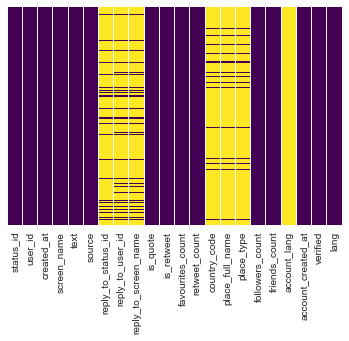

In [226]:
sns.heatmap(df.isnull(), cbar=False , yticklabels=False, cmap='viridis')  

**So there are 7 columns which have the missing values we have lots of data so we can afford to drop missing values**
* Dropping account_lang because its completely null
* Dropping reply_to_status_id , reply_to_user_id , reply_to_screen_name , lang,account_lang , friends_count , place_type  becasue they are   not conveying any useful Info.
* Then we are going to filter those tweets which do have their regional Info (country_code,place_full_name)

## Feature Selection 

**In this portion of our data we will trim the features (fileds) that doesnt convey any useful information and just messing the data**

In [227]:
df.drop(["reply_to_status_id" , "reply_to_user_id" , "reply_to_screen_name" , "lang" , "account_lang" , "friends_count" , "place_type" ],axis=1, inplace=True) 

#### Lets See Number of tweets from Authentic  vs Non-Authentic Accounts

<AxesSubplot:xlabel='verified', ylabel='count'>

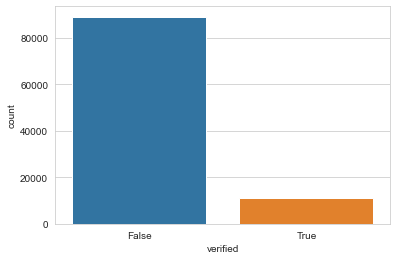

In [233]:
sns.countplot(x=df['verified'])

## Data Cleaning
* Droping Null Values 
* Dropping Duplicate value

In [234]:
df.dropna(inplace=True)

In [235]:
df.shape

(5153, 15)

In [236]:
df.drop_duplicates(inplace=True)

In [237]:
df.shape

(5153, 15)

* Lets Visualize and see the Quality of data before we move forward

<AxesSubplot:>

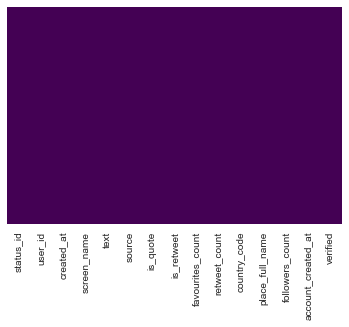

In [238]:
sns.heatmap(df.isnull(), cbar=False , yticklabels=False, cmap='viridis')  

**Applying some NLP techniques to clean the text data**

## Text  Prepocessing  

In [239]:
string.punctuation #  Punctuations

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [240]:
stopwords.words("english") # Stopwords 

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [241]:
df['text'].head(5)

172    We distributed hand sanitizers to 1000 market ...
189    So who’s deputising for BoJo now? #BorisJohnso...
202    Geriatric Consultant Dr Anton Sebastianpillai ...
220    @grrr199820 @mr_mookie @tariqnasheed I just po...
231    La sentencia contra #Correa es como cuando gan...
Name: text, dtype: object

In [242]:
def cleaner(mess):
    """
    1.Reomve Punctuation
    2.Remove Stopwords
    3.Retuen a clean String
    """
    nopunc=[word for word in mess if word not in string.punctuation]
    nopunc="".join(nopunc)
    nopunc = re.sub(emoji.get_emoji_regexp(), r"", nopunc)       # Removing emojies
    clean_mess=[word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return clean_mess

In [243]:
df["text"]=df["text"].apply(cleaner)

In [244]:
df['text'].head()

172    [distributed, hand, sanitizers, 1000, market, ...
189    [who’s, deputising, BoJo, BorisJohnson, BorisJ...
202    [Geriatric, Consultant, Dr, Anton, Sebastianpi...
220    [grrr199820, mrmookie, tariqnasheed, posted, t...
231    [La, sentencia, contra, Correa, es, como, cuan...
Name: text, dtype: object

**We have Removed All the Stopword,Punctuations emojies and unwanted stuff from our text data**

### And now We are Good to go for Analysis ...  with this neat and tidy data

# Exploratory Data Analysis 

* Tweets and their counts

In [245]:
df1 = df.loc[:,['text', 'retweet_count']] # Tweet and its Retweet count
df1.head(5)

,text,retweet_count
172,"[distributed, hand, sanitizers, 1000, market, ...",1
189,"[who’s, deputising, BoJo, BorisJohnson, BorisJ...",0
202,"[Geriatric, Consultant, Dr, Anton, Sebastianpi...",4
220,"[grrr199820, mrmookie, tariqnasheed, posted, t...",0
231,"[La, sentencia, contra, Correa, es, como, cuan...",2


### Top 10 most retweeted Tweets

In [250]:
print("\n These are the Most Retweeted tweets of ", date)
df1.sort_values(by='retweet_count',ascending=False).head(10)


 These are the Most Retweeted tweets of  2020-04-08


,text,retweet_count
20499,"[MADNESS, absolutely, crazy, scene, temporary,...",364
31564,"[Sad, stories, attending, Docs, honoring, wish...",311
75610,"[ผู้ติดเชื้อใหม่, 111, คนโดยมี, 42, คนพึ่งกลับ...",233
18481,"[สถิติคณะที่กลับมาจากดะอ์วะห์ที่อินโดนีเซีย, ก...",190
67964,"[Telugu, daily, EenaduNewspapr, given, Hindu, ...",165
84934,"[VIRAL, EKSPONENSIAL, Dunia, perlu, 34, bulan,...",137
11850,"[Ten, 10, new, ventilators, installed, RIMS, 0...",94
7679,"[Well, that’s, conflict, interest, comes, Covi...",86
53585,"[Coronavirus, Trump, announces, hold, US, fund...",86
23452,"[It’s, hard, believe, middle, global, pandemic...",85


#### Now lets see to whom these tweets belong to 

In [259]:
df2=df.sort_values(by='retweet_count',ascending=False).head(11)

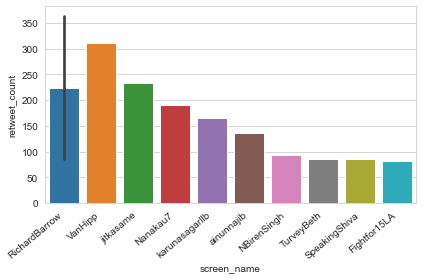

In [264]:
fig.set_size_inches(11.7, 8.27)
ax=sns.barplot(x='screen_name',y='retweet_count',data=df2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

**These guys were leading the COVID-19 trend on that day**

### Now lets have look on their followers (How many people they are influencing)

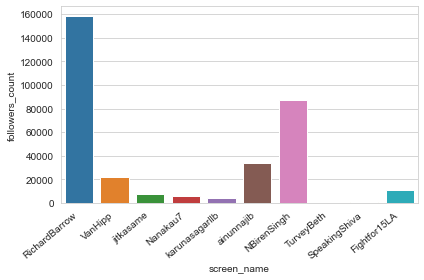

In [272]:
fig.set_size_inches(11.7, 8.27)
ax=sns.barplot(x='screen_name',y='followers_count',data=df2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

**Now lets see how many of them had Verified(Aunthentic) accounts**

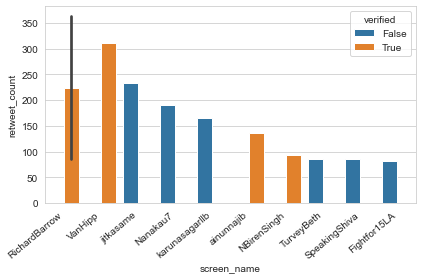

In [265]:
fig.set_size_inches(11.7, 8.27)
ax=sns.barplot(x='screen_name',y='retweet_count',data=df2,hue='verified')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

### Which Place were the most active on that day

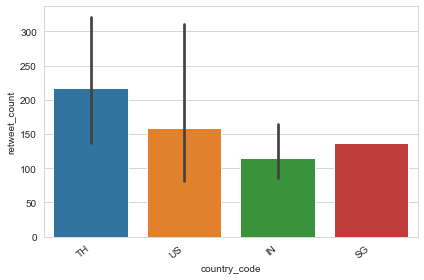

In [284]:
fig.set_size_inches(11.7, 8.27)
ax=sns.barplot(x='country_code',y='retweet_count',data=df2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

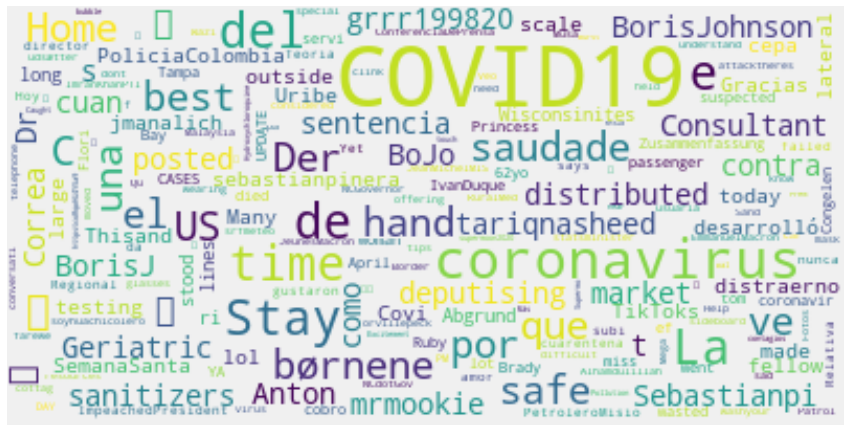

In [311]:
def show_wordcloud(data , title = None):
    wordcloud = WordCloud(background_color='rgb(240, 240, 240)',max_words=200,max_font_size=40).generate(str(data))
  
    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    plt.title(title, size = 25)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

show_wordcloud(df1['text'])

In [ ]:
df2['text']

### THANK YOU 